In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Test the connection by counting rows in block_stats
query = "SELECT COUNT(*) FROM block_stats"
block_count = pd.read_sql(query, engine)
print(f"Total blocks in block_stats: {block_count.iloc[0, 0]}")

Total blocks in block_stats: 858543


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query block data
query = """
    SELECT block_height, total_fee, txs, timestamp
    FROM block_stats
    ORDER BY block_height ASC
    LIMIT 1000000;
"""

# Load the data into a pandas DataFrame
block_data = pd.read_sql(query, engine)

# Convert the timestamp to a datetime object
block_data['timestamp'] = pd.to_datetime(block_data['timestamp'], unit='s')

# Display the first few rows of the dataframe
block_data.head()

,block_height,total_fee,txs,timestamp
0,0,0,1,2009-01-03 18:15:05
1,1,0,1,2009-01-09 02:54:25
2,2,0,1,2009-01-09 02:55:44
3,3,0,1,2009-01-09 03:02:53
4,4,0,1,2009-01-09 03:16:28


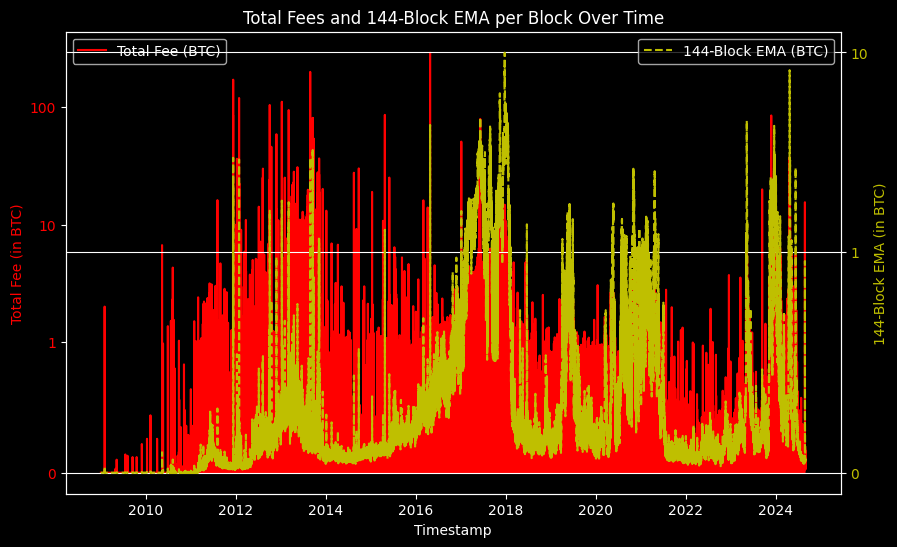

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Convert total fees from satoshis to BTC
block_data['total_fee_btc'] = block_data['total_fee'] / 100_000_000

# Calculate the 2016-block Exponential Moving Average (EMA) of total fees
block_data['ema_2016_fee'] = block_data['total_fee_btc'].ewm(span=144, adjust=False).mean()

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the total fees in BTC on the left y-axis
ax1.plot(block_data['timestamp'], block_data['total_fee_btc'], color='r', label='Total Fee (BTC)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Total Fee (in BTC)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Apply symlog scale to the left y-axis
ax1.set_yscale('symlog', linthresh=1)  # Linear scaling around 1 BTC
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())  # Human-readable format for major ticks
ax1.yaxis.set_minor_formatter(mticker.ScalarFormatter())  # Human-readable format for minor ticks

# Create a second y-axis (right side) for the EMA
ax2 = ax1.twinx()
ax2.plot(block_data['timestamp'], block_data['ema_2016_fee'], color='y', label='144-Block EMA (BTC)', linestyle='--')
ax2.set_ylabel('144-Block EMA (in BTC)', color='y')
ax2.tick_params(axis='y', labelcolor='y')

# Set limits and formatting for the second y-axis (EMA)
ax2.set_yscale('symlog', linthresh=1)
ax2.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax2.yaxis.set_minor_formatter(mticker.ScalarFormatter())

# Add legends for both lines
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set the title and grid
plt.title('Total Fees and 144-Block EMA per Block Over Time')
plt.grid(True)

# Show the plot
plt.show()


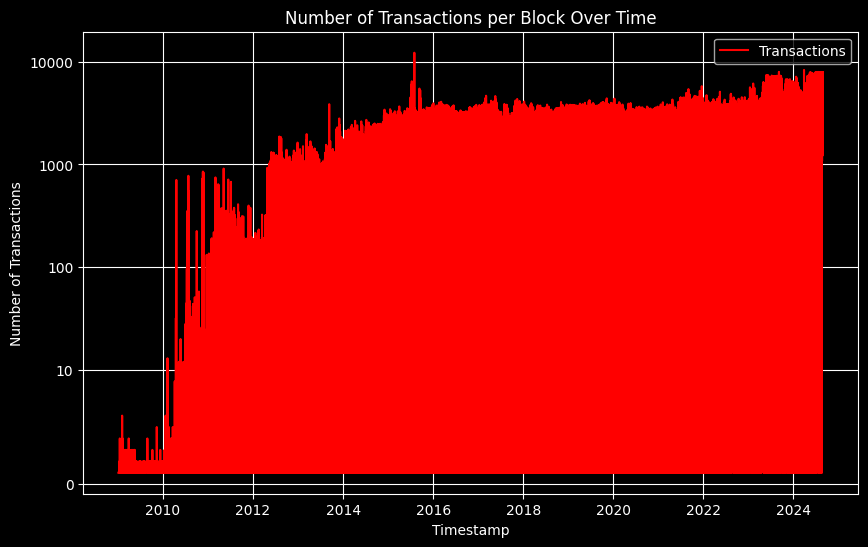

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))

# Plot the number of transactions over time
plt.plot(block_data['timestamp'], block_data['txs'], color='r', label='Transactions')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Block Over Time')

# Apply symlog scale to the y-axis
plt.yscale('symlog', linthresh=10)  # Linear scaling around 10 transactions
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())  # Human-readable format
plt.gca().yaxis.set_minor_formatter(mticker.ScalarFormatter())

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


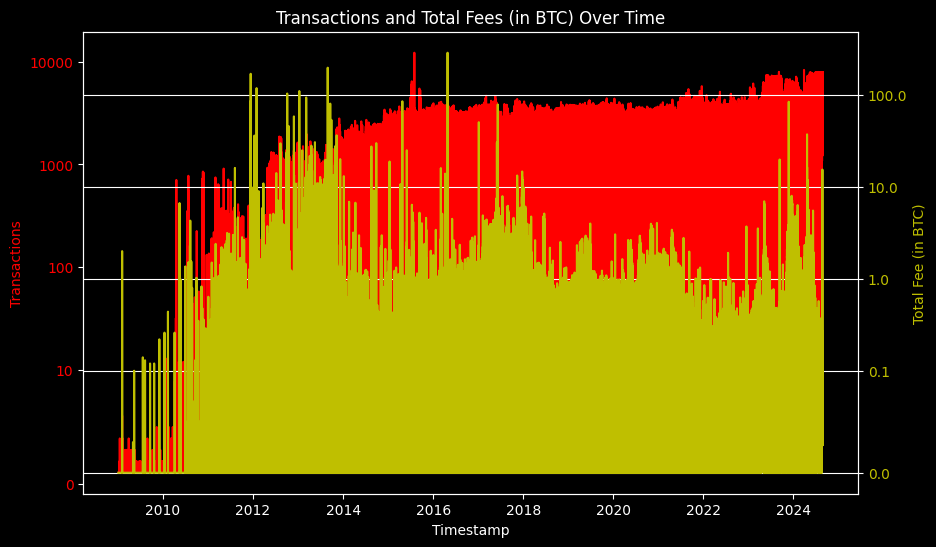

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Convert total_fee from satoshis to BTC
block_data['total_fee_btc'] = block_data['total_fee'] / 100_000_000

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot transactions on the left y-axis
ax1.set_xlabel('Timestamp', color='white')
ax1.set_ylabel('Transactions', color='r')
ax1.plot(block_data['timestamp'], block_data['txs'], color='r', label='Transactions')
ax1.tick_params(axis='y', labelcolor='r')
ax1.tick_params(axis='x', labelcolor='white')  # Make x-axis labels white as well

# Apply symlog scale to the left y-axis (Transactions)
ax1.set_yscale('symlog', linthresh=10)  # Set a threshold for linear scaling near 10 transactions
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())  # Human-readable format
ax1.yaxis.set_minor_formatter(mticker.ScalarFormatter())

# Create another y-axis for the total fees (now in BTC)
ax2 = ax1.twinx()
ax2.set_ylabel('Total Fee (in BTC)', color='y')
ax2.plot(block_data['timestamp'], block_data['total_fee_btc'], color='y', label='Total Fee (BTC)')
ax2.tick_params(axis='y', labelcolor='y')

# Apply symlog scale to the right y-axis (Total Fee in BTC)
ax2.set_yscale('symlog', linthresh=0.1)  # Set a threshold for linear scaling near 0.1 BTC
ax2.yaxis.set_major_formatter(mticker.ScalarFormatter())  # Human-readable format
ax2.yaxis.set_minor_formatter(mticker.ScalarFormatter())

plt.title('Transactions and Total Fees (in BTC) Over Time', color='white')
plt.grid(True)
plt.show()


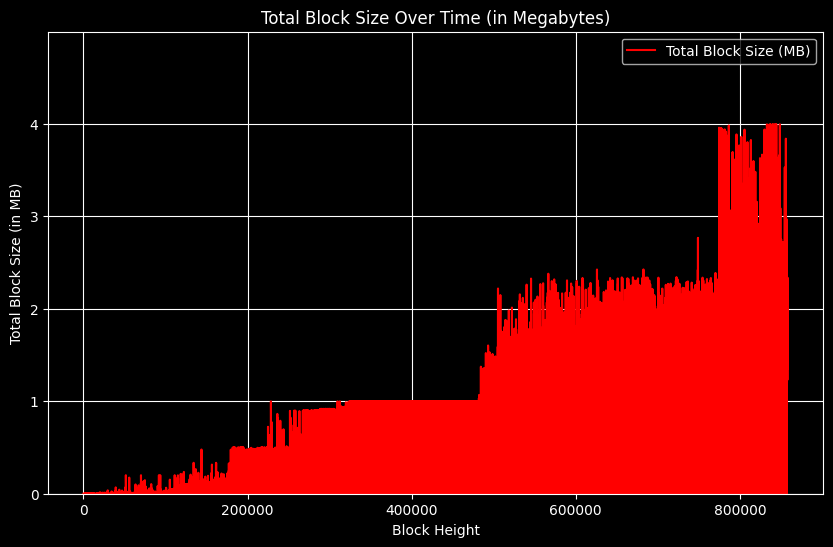

In [6]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query more detailed block statistics
query = """
    SELECT block_height, total_size, total_weight, swtxs
    FROM block_stats
    ORDER BY block_height ASC
    LIMIT 1000000;
"""

# Load the data into a pandas DataFrame using SQLAlchemy engine
block_stats = pd.read_sql(query, engine)

# Convert total_size from bytes to Megabytes
block_stats['total_size_MB'] = block_stats['total_size'] / 1_000_000  # Divide by 1 million to convert to MB

# Plot total block size over time in Megabytes
plt.figure(figsize=(10, 6))
plt.plot(block_stats['block_height'], block_stats['total_size_MB'], color='r', label='Total Block Size (MB)')
plt.xlabel('Block Height')
plt.ylabel('Total Block Size (in MB)')
plt.title('Total Block Size Over Time (in Megabytes)')
plt.legend()
plt.grid(True)

# Set y-axis limit dynamically based on data range
plt.ylim([0, block_stats['total_size_MB'].max() * 1.25])  # Add some padding to the max value for better visualization

plt.show()


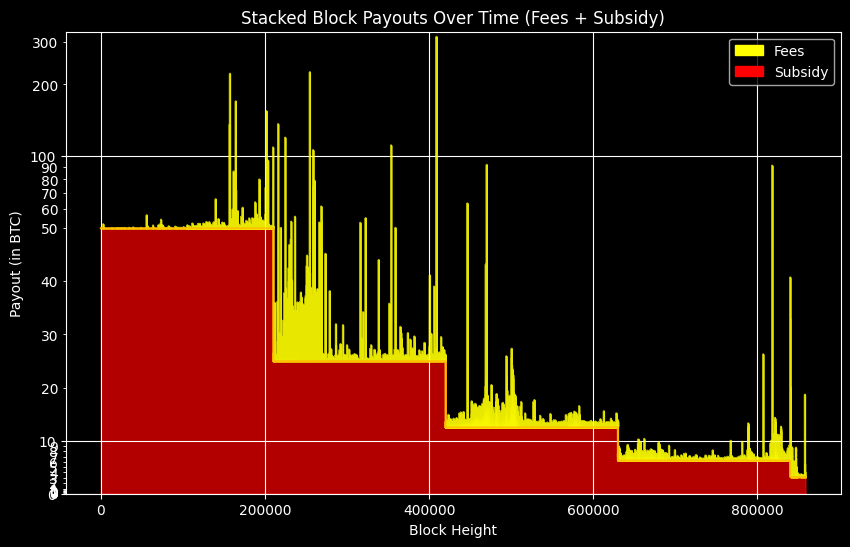

In [7]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches

# Load environment variables from the .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query the block payouts data (fees and subsidy)
query = """
    SELECT block_height, total_fee, subsidy
    FROM block_stats
    ORDER BY block_height ASC
    LIMIT 1000000;
"""

# Load the data into a pandas DataFrame using SQLAlchemy engine
block_payouts = pd.read_sql(query, engine)

# Convert total_fee and subsidy from satoshis to BTC
block_payouts['total_fee_btc'] = block_payouts['total_fee'] / 100_000_000  # 1 BTC = 100 million satoshis
block_payouts['subsidy_btc'] = block_payouts['subsidy'] / 100_000_000

# Prepare data for stacked plot (Subsidy + Fees)
block_payouts.set_index('block_height', inplace=True)
stack_data = block_payouts[['subsidy_btc', 'total_fee_btc']]

# Plot a stacked area chart with symlog y-axis
stack_data.plot.area(figsize=(10, 6), stacked=True, color=['red', 'yellow'], alpha=0.7)
plt.yscale('symlog', linthresh=50)  # Use symlog scale with a threshold value for linear behavior around 10 BTC

# Set custom ticks for the y-axis
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.set_minor_locator(mticker.LogLocator(base=10.0, subs='auto'))

plt.xlabel('Block Height')
plt.ylabel('Payout (in BTC)')
plt.title('Stacked Block Payouts Over Time (Fees + Subsidy)')
plt.grid(True)

# Create custom legend handles
fees_patch = mpatches.Patch(color='yellow', label='Fees')
subsidy_patch = mpatches.Patch(color='red', label='Subsidy')

# Add the custom legend
plt.legend(handles=[fees_patch, subsidy_patch])

plt.show()


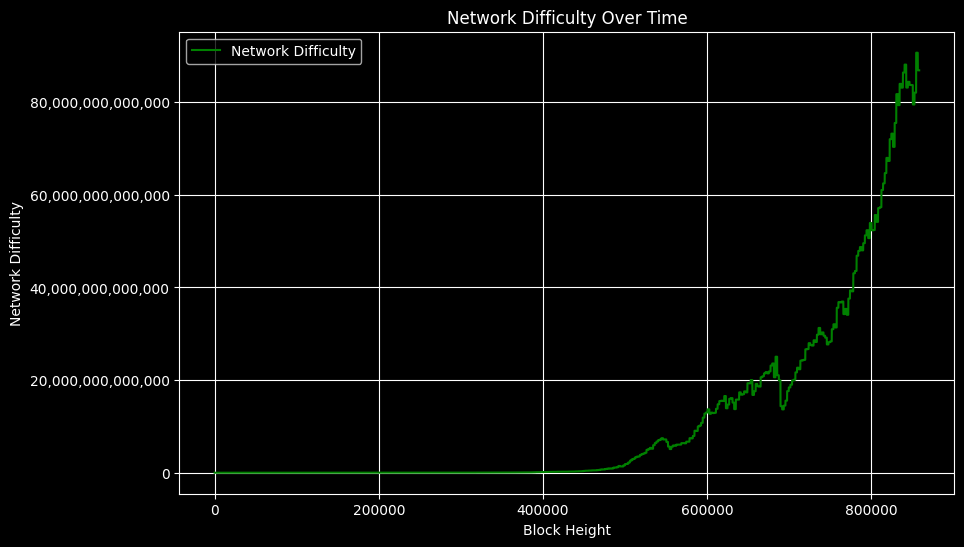

In [8]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from matplotlib.ticker import FuncFormatter

# Load environment variables from the .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query the block headers data (block height and difficulty)
query = """
    SELECT block_height, difficulty
    FROM block_headers
    ORDER BY block_height ASC;
"""

# Load the data into a pandas DataFrame using SQLAlchemy engine
difficulty_data = pd.read_sql(query, engine)

# Create a formatter function for the y-axis
def human_format(x, pos):
    # Format the number with commas for large numbers
    return f'{x:,.0f}'

# Plot the network difficulty over time
plt.figure(figsize=(10, 6))
plt.plot(difficulty_data['block_height'], difficulty_data['difficulty'], color='g', label='Network Difficulty')

# Set axis labels and title
plt.xlabel('Block Height')
plt.ylabel('Network Difficulty')
plt.title('Network Difficulty Over Time')

# Apply human-readable formatting to the y-axis
formatter = FuncFormatter(human_format)
plt.gca().yaxis.set_major_formatter(formatter)

# Show grid, legend and the plot
plt.legend()
plt.grid(True)
plt.show()


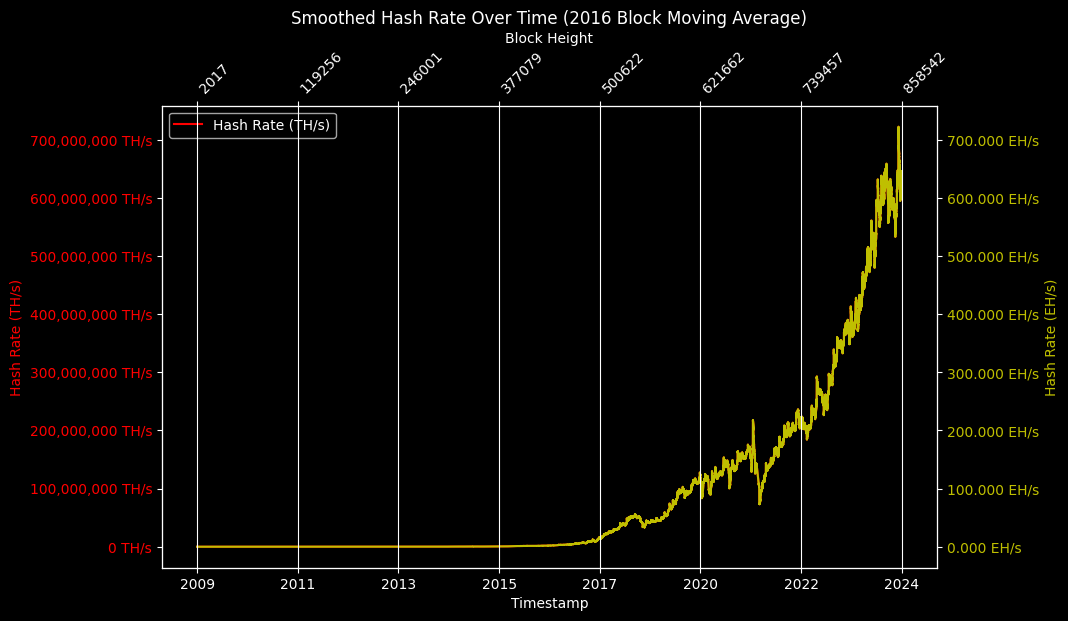

In [9]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from matplotlib.ticker import FuncFormatter

# Load environment variables from the .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query the block headers data (block height, difficulty, and timestamp)
query = """
    SELECT block_height, difficulty, time
    FROM block_headers
    ORDER BY block_height ASC;
"""

# Load the data into a pandas DataFrame using SQLAlchemy engine
block_data = pd.read_sql(query, engine)

# Convert timestamp to datetime for easier readability
block_data['timestamp'] = pd.to_datetime(block_data['time'], unit='s')

# Drop duplicates and sort data by timestamp to ensure monotonicity
block_data = block_data.drop_duplicates(subset='timestamp').sort_values('timestamp')

# Calculate the time difference between consecutive blocks
block_data['time_diff'] = block_data['time'].diff()

# Remove NaN for the first time_diff row
block_data = block_data.dropna(subset=['time_diff'])

# Calculate the moving average of time differences for every 2016 blocks (difficulty adjustment window)
block_data['avg_time_diff'] = block_data['time_diff'].rolling(window=2016).mean()

# Calculate the hash rate using the formula: (Difficulty * 2^32) / (Average Time Difference)
block_data['hash_rate'] = (block_data['difficulty'] * (2**32)) / block_data['avg_time_diff']
block_data['hash_rate_ths'] = block_data['hash_rate'] / 1e12  # Convert to TH/s
block_data['hash_rate_ehs'] = block_data['hash_rate'] / 1e18  # Convert to EH/s

# Drop NaN rows from the rolling average operation
block_data = block_data.dropna(subset=['avg_time_diff'])

### Part 1: Plot Hash Rate Over Time (Bottom X-axis: Timestamp)

# Create a formatter function for the y-axis (to show hash rate in TH/s)
def human_format(x, pos):
    return f'{x:,.0f} TH/s'

# Create the main plot for hash rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot hash rate on the primary x-axis (timestamp)
ax1.plot(block_data['timestamp'], block_data['hash_rate_ths'], color='r', label='Hash Rate (TH/s)')

# Set x-axis (bottom) for timestamp and y-axis labels
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Hash Rate (TH/s)', color='r')

# Apply human-readable formatting to the y-axis for TH/s
ax1.yaxis.set_major_formatter(FuncFormatter(human_format))
ax1.tick_params(axis='y', labelcolor='r')

# Set title
plt.title('Smoothed Hash Rate Over Time (2016 Block Moving Average)')

# Adjust tick locations and format for the timestamp x-axis
ax1.set_xticks(pd.date_range(start=block_data['timestamp'].min(), end=block_data['timestamp'].max(), periods=8))

### Part 2: Add secondary y-axis for Hash Rate in EH/s (Exahashes per second)

# Create the secondary y-axis for EH/s
ax2 = ax1.twinx()

# Plot the same hash rate data but in EH/s
ax2.plot(block_data['timestamp'], block_data['hash_rate_ehs'], color='y', label='Hash Rate (EH/s)')
ax2.set_ylabel('Hash Rate (EH/s)', color='y')

# Apply human-readable formatting to the y-axis for EH/s
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.3f} EH/s'))
ax2.tick_params(axis='y', labelcolor='y')

### Part 3: Map Block Height to Timestamp (Top X-axis)

# Create a secondary x-axis for block height
ax3 = ax1.twiny()

# Set the limits for the secondary x-axis (block height)
ax3.set_xlim(ax1.get_xlim())

# Create key timestamps at regular intervals
timestamps_for_ticks = pd.date_range(start=block_data['timestamp'].min(), end=block_data['timestamp'].max(), periods=8)

# Merge the closest block heights to the timestamps using pd.merge_asof
block_heights_at_ticks = pd.merge_asof(
    pd.DataFrame(timestamps_for_ticks, columns=['timestamp']),  # The target timestamps for ticks
    block_data[['timestamp', 'block_height']],                  # The block data with heights
    on='timestamp',                                              # Match by timestamp
    direction='backward'                                         # Use the closest previous block
)

# Set ticks and labels for the secondary x-axis (block height)
ax3.set_xticks(ax1.get_xticks())
ax3.set_xticklabels(block_heights_at_ticks['block_height'].astype(int), rotation=45, ha="left", fontsize=10)
ax3.set_xlabel('Block Height')

# Add legend to the plot
ax1.legend(loc='upper left')

# Show grid and the plot
plt.grid(True)
plt.show()


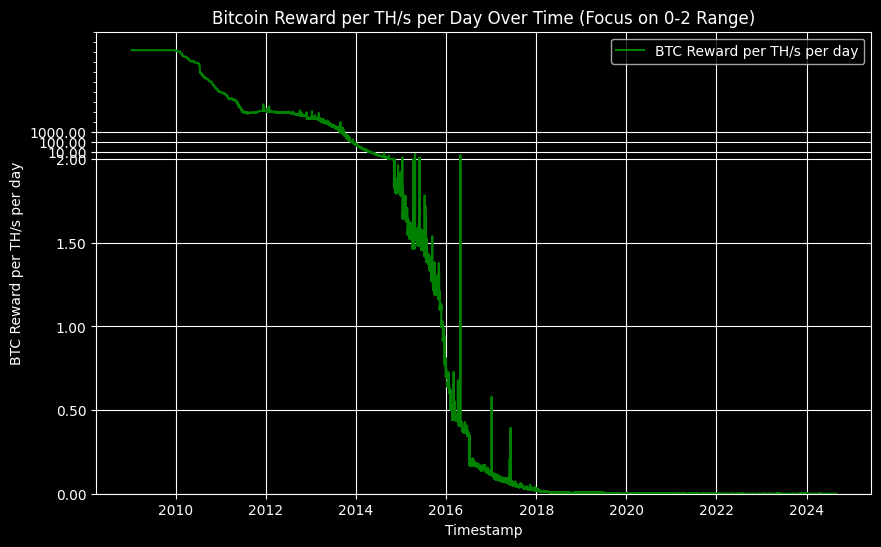

In [10]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

# Load environment variables from the .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query both the block_headers and block_stats data
query = """
    SELECT bh.block_height, bh.difficulty, bh.time, bs.subsidy, bs.total_fee
    FROM block_headers bh
    JOIN block_stats bs ON bh.block_height = bs.block_height
    ORDER BY bh.block_height ASC;
"""

# Load the data into a pandas DataFrame using SQLAlchemy engine
block_data = pd.read_sql(query, engine)

# Convert timestamp to datetime for easier readability
block_data['timestamp'] = pd.to_datetime(block_data['time'], unit='s')

# Constants
blocks_per_day = 144
two_pow_32 = 2**32
seconds_per_day = 86400
scaling_factor = 10**12

# Calculate block rewards (subsidy + fees) in BTC
block_data['block_reward'] = (block_data['subsidy'] + block_data['total_fee']) / 100_000_000  # Convert to BTC

# Calculate the Bitcoin Reward per TH/s per day
block_data['reward_per_ths_per_day'] = (
    (block_data['block_reward'] * blocks_per_day) / (block_data['difficulty'] * two_pow_32) 
) * scaling_factor * seconds_per_day

# Drop any NaN values after calculation
block_data = block_data.dropna(subset=['reward_per_ths_per_day'])

# Create a custom formatter for y-axis labels
def human_format(x, pos):
    return f'{x:.2f}'

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bitcoin Reward per TH/s per day with symlog scaling
ax1.plot(block_data['timestamp'], block_data['reward_per_ths_per_day'], color='g', label='BTC Reward per TH/s per day')

# Set symlog scale for y-axis with a linthresh to stretch values between 0 and 2
ax1.set_yscale('symlog', linthresh=2, linscale=30)  # Adjust linscale to further compress the non-linear space

# Set limits for the y-axis to focus on values up to 2
ax1.set_ylim([0, 10000000000000])

# Set labels and title
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('BTC Reward per TH/s per day')

# Set custom y-axis ticks for more focus on values between 0 and 2
ax1.set_yticks([0, 0.5, 1, 1.5, 2, 10, 100, 1000])
ax1.get_yaxis().set_major_formatter(FuncFormatter(human_format))

# Set title and grid
plt.title('Bitcoin Reward per TH/s per Day Over Time (Focus on 0-2 Range)')
plt.grid(True)

# Show legend and plot
plt.legend()
plt.show()


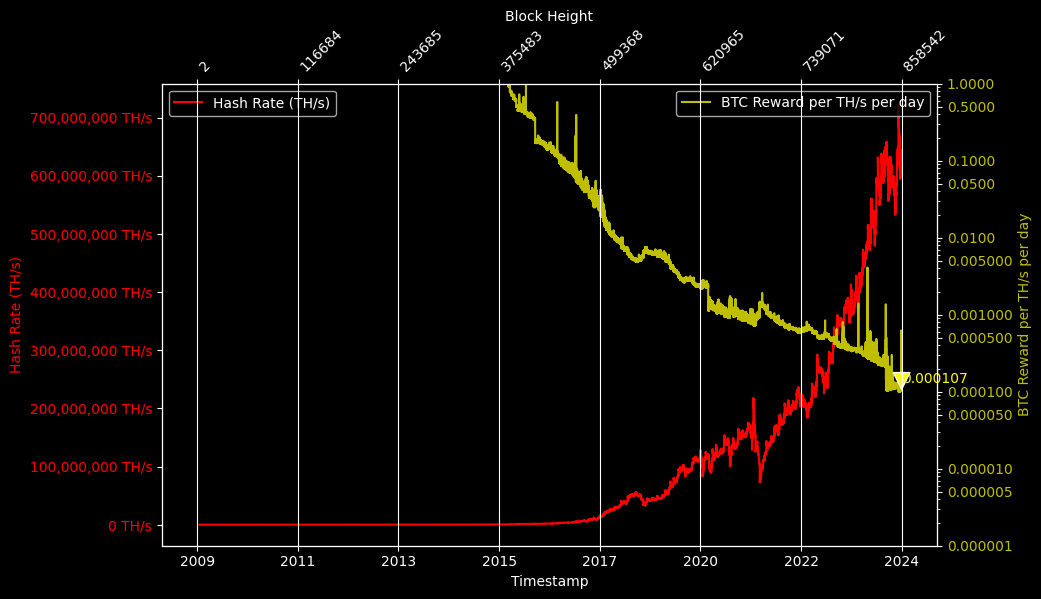

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from matplotlib.ticker import FuncFormatter, LogLocator

# Load environment variables from the .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Set the style to 'dark_background'
plt.style.use('dark_background')

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query both the block_headers and block_stats data
query = """
    SELECT bh.block_height, bh.difficulty, bh.time, bs.subsidy, bs.total_fee
    FROM block_headers bh
    JOIN block_stats bs ON bh.block_height = bs.block_height
    ORDER BY bh.block_height ASC;
"""

# Load the data into a pandas DataFrame using SQLAlchemy engine
block_data = pd.read_sql(query, engine)

# Convert timestamp to datetime for easier readability
block_data['timestamp'] = pd.to_datetime(block_data['time'], unit='s')

# Drop duplicates and sort data by timestamp to ensure monotonicity
block_data = block_data.drop_duplicates(subset='timestamp').sort_values('timestamp')

# Calculate the time difference between consecutive blocks
block_data['time_diff'] = block_data['time'].diff()

# Remove NaN for the first time_diff row
block_data = block_data.dropna(subset=['time_diff'])

# Calculate the moving average of time differences for every 2016 blocks (difficulty adjustment window)
block_data['avg_time_diff'] = block_data['time_diff'].rolling(window=2016).mean()

# Calculate the hash rate using the formula: (Difficulty * 2^32) / (Average Time Difference)
block_data['hash_rate'] = (block_data['difficulty'] * (2**32)) / block_data['avg_time_diff']
block_data['hash_rate_ths'] = block_data['hash_rate'] / 1e12  # Convert to TH/s
block_data['hash_rate_ehs'] = block_data['hash_rate'] / 1e18  # Convert to EH/s

# Constants for BTC reward calculation
blocks_per_day = 144
two_pow_32 = 2**32
seconds_per_day = 86400
scaling_factor = 10**12

# Calculate block rewards (subsidy + fees) in BTC
block_data['block_reward'] = (block_data['subsidy'] + block_data['total_fee']) / 100_000_000  # Convert to BTC

# Calculate the Bitcoin Reward per TH/s per day
block_data['reward_per_ths_per_day'] = (
    (block_data['block_reward'] * blocks_per_day) / (block_data['difficulty'] * two_pow_32) 
) * scaling_factor * seconds_per_day

# Drop any NaN values after calculation
block_data = block_data.dropna(subset=['reward_per_ths_per_day'])

### Plotting both hash rate and BTC reward per TH/s per day ###

# Create a formatter function for the left y-axis (to show hash rate in TH/s)
def human_format(x, pos):
    return f'{x:,.0f} TH/s'

# Create a formatter function for the right y-axis (to show BTC Reward per TH/s per day)
def btc_reward_format(x, pos):
    if x >= 0.01:
        return f'{x:.4f}'  # Display up to 4 decimal places for values >= 0.01
    elif x > 0:  # Handle values smaller than 0.01
        return f'{x:.6f}'  # Display up to 6 decimal places for values < 0.01
    else:
        return '0.000000'  # Handle zero case

# Create the main plot for hash rate and BTC Reward
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot hash rate on the primary x-axis (timestamp)
ax1.plot(block_data['timestamp'], block_data['hash_rate_ths'], color='r', label='Hash Rate (TH/s)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Hash Rate (TH/s)', color='r')

# Apply human-readable formatting to the left y-axis
ax1.yaxis.set_major_formatter(FuncFormatter(human_format))
ax1.tick_params(axis='y', labelcolor='r')

# Set custom ticks for the bottom x-axis (timestamp)
ax1.set_xticks(pd.date_range(start=block_data['timestamp'].min(), end=block_data['timestamp'].max(), periods=8))

# Create a secondary y-axis for BTC Reward per TH/s per day
ax2 = ax1.twinx()

# Plot BTC Reward per TH/s per day on the same x-axis (timestamp)
ax2.plot(block_data['timestamp'], block_data['reward_per_ths_per_day'], color='y', label='BTC Reward per TH/s per day')

# Use a log scale for the right y-axis to evenly distribute ticks
ax2.set_yscale('log')

# Set a wider ylim to cover more range
ax2.set_ylim([1e-6, 1])  # Set limits for log scale, extending down to 1e-6

# Apply human-readable formatting to the right y-axis with up to 6 decimal places for smaller values
ax2.set_ylabel('BTC Reward per TH/s per day', color='y')
ax2.yaxis.set_major_formatter(FuncFormatter(btc_reward_format))
ax2.tick_params(axis='y', labelcolor='y')

# Adjust tick placement to use a log locator with subs for better spacing
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0, 5.0]))  # Shows ticks at .001, .0005, .00005

### Add secondary x-axis for block height ###

# Create a secondary x-axis for block height
ax3 = ax1.twiny()

# Set the limits for the secondary x-axis (block height)
ax3.set_xlim(ax1.get_xlim())

# Create key timestamps at regular intervals
timestamps_for_ticks = pd.date_range(start=block_data['timestamp'].min(), end=block_data['timestamp'].max(), periods=8)

# Merge the closest block heights to the timestamps using pd.merge_asof
block_heights_at_ticks = pd.merge_asof(
    pd.DataFrame(timestamps_for_ticks, columns=['timestamp']),  # The target timestamps for ticks
    block_data[['timestamp', 'block_height']],                  # The block data with heights
    on='timestamp',                                              # Match by timestamp
    direction='backward'                                         # Use the closest previous block
)

# Set ticks and labels for the secondary x-axis (block height)
ax3.set_xticks(ax1.get_xticks())
ax3.set_xticklabels(block_heights_at_ticks['block_height'].astype(int), rotation=45, ha="left", fontsize=10)
ax3.set_xlabel('Block Height')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

### Add indicator for the last data point on ax2 ###
last_point_x = block_data['timestamp'].iloc[-1]
last_point_y = block_data['reward_per_ths_per_day'].iloc[-1]

# Annotate the last point with the exact value
ax2.annotate(f'{last_point_y:.6f}', xy=(last_point_x, last_point_y), 
             xytext=(last_point_x, last_point_y*1.2),  # Adjust position above the point
             arrowprops=dict(facecolor='yellow', shrink=0.05),
             color='yellow', fontsize=10)

# Show grid and plot
plt.grid(True)
plt.show()

##### 